# FIR Frequency sampling 1

In [236]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib widget
%matplotlib inline

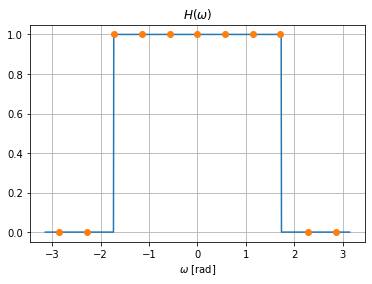

In [240]:
# Filtro pasabajos ideal truncado

fc = 0.275
wc = fc*2*np.pi

Nw = 11
w = 2*np.pi*(np.arange(Nw)-((Nw-1)/2)) / Nw
#w = 2*np.pi*(np.arange(Nw)-np.fix(Nw/2)) / Nw

def HPB(w,wc):
    H = 1*(np.abs(w)<wc)
    return H

Hw = HPB(w,wc)

wid = np.linspace(-np.pi,np.pi,1001)
Hid = HPB(wid,wc)

fig = plt.figure()
plt.plot(wid,Hid)
plt.plot(w,Hw,'o')
plt.xlabel('$\omega$ [rad]')
plt.title('$H(\omega)$')
plt.grid('on')


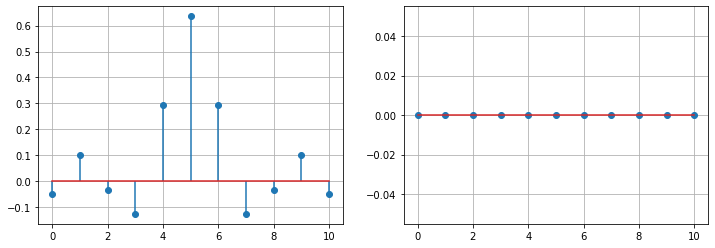

In [241]:
# Respuesta en frecuencia

alpha = w[int(np.fix(Nw/2))]
Hw_shift = np.fft.ifftshift(Hw)
hn = np.fft.ifft(Hw_shift)
hn = np.fft.fftshift(hn) * np.exp(1j*alpha*(np.arange(Nw)-Nw/2)) 

fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.stem(np.real(hn))
plt.grid('on')

plt.subplot(1,2,2)
plt.stem(np.imag(hn))
plt.grid('on')


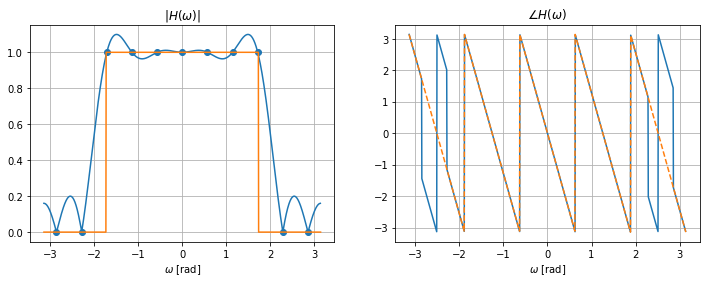

In [242]:
# Respuesta en frecuencia

N = 1024
Homg = np.fft.fft(np.real(hn),N)
Homg = np.fft.fftshift(Homg)
omg = 2*np.pi*(np.arange(0,N) - N/2)/N

fig = plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(omg,np.abs(Homg))
plt.plot(w,np.abs(Hw),'C0o')
plt.plot(wid,np.abs(Hid))
plt.xlabel('$\omega$ [rad]')
plt.title('$|H(\omega)|$')
plt.grid('on')

plt.subplot(1,2,2)
plt.plot(omg,np.angle(Homg))
plt.plot(wid,np.angle(np.exp(-1j*wid*np.fix(Nw/2))),'--')
plt.xlabel('$\omega$ [rad]')
plt.title('$\\angle H(\omega)$')
plt.grid('on')
